### 数値計算に用いるライブラリ

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

### グラフを描画するライブラリ

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

### 表示桁数の指定

In [4]:
%precision 3

'%.3f'

### グラフをJupyter Notebookで表示するための設定

In [5]:
%matplotlib inline

### 標本平均の計算

In [6]:
population = stats.norm(loc = 4, scale = 0.8)

In [7]:
sample_mean_array = np.zeros(10000)

In [8]:
np.random.seed(1)
for i in range(0, 10000): 
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)

In [9]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

### 標本平均の平均値と母平均

In [10]:
sp.mean(sample_mean_array)

4.004

In [11]:
sp.std(sample_mean_array, ddof = 1)

0.251

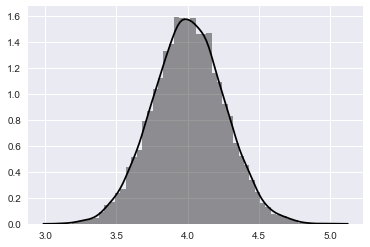

In [12]:
sns.distplot(sample_mean_array, color = 'black')

### サンプルサイズ，標本平均，母平均の関係

In [13]:
size_array = np.arange(start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [14]:
sample_mean_array_size = np.zeros(len(size_array))

In [15]:
np.random.seed(1)
for i in range(0, len(size_array)): 
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

Text(0,0.5,'sample mean')

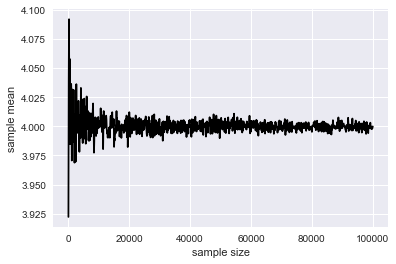

In [16]:
plt.plot(size_array, sample_mean_array_size, color = 'black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

### 標本平均を何度も計算する関数

In [17]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial): 
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

In [18]:
np.random.seed(1)
sp.mean(calc_sample_mean(size = 10, n_trial = 10000))

4.004

In [19]:
np.random.seed(1)

# size = 10
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10, 
    "size"       :np.tile("size 10", 10000) 
})

# size = 20
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20, 
    "size"       :np.tile("size 20", 10000) 
})

# size = 30
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30, 
    "size"       :np.tile("size 30", 10000) 
})

# Combine cases where size = 10, 20, 30
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])
# Show results
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


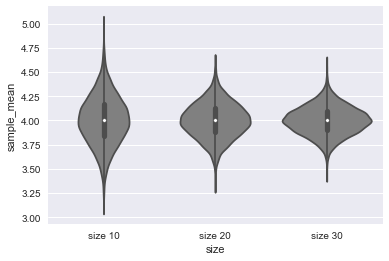

In [20]:
sns.violinplot(x = "size", y = "sample_mean", 
               data = sim_result, color = 'gray')

In [21]:
size_array = np.arange(
    start =2, stop = 102, step =2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [22]:
sample_mean_std_array = np.zeros(len(size_array))

In [23]:
np.random.seed(1)
for i in range(0, len(size_array)): 
    sample_mean = calc_sample_mean(size = size_array[i], n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof = 1)

Text(0,0.5,'mean_std value')

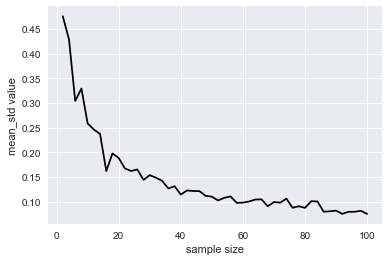

In [24]:
plt.plot(size_array, sample_mean_std_array, color = 'black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [25]:
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0,0.5,'mean_std value')

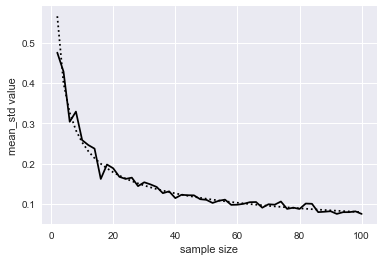

In [26]:
plt.plot(size_array, sample_mean_std_array, color = 'black')
plt.plot(size_array, standard_error, color = 'black', linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [27]:
sample_var_array = np.zeros(10000)

In [28]:
np.random.seed(1)
for i in range(0, 10000): 
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof = 0)

In [29]:
sp.mean(sample_var_array)

0.575

In [30]:
unbias_var_array = np.zeros(10000)

In [31]:
np.random.seed(1)
for i in range(0, 10000): 
    sample = population.rvs(size = 10)
    unbias_var_array[i] = sp.var(sample, ddof = 1)

In [32]:
sp.mean(unbias_var_array)

0.639

In [33]:
size_array = np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [34]:
unbias_var_array_size = np.zeros(len(size_array))

In [35]:
np.random.seed(1)
for i in range(0, len(size_array)): 
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof = 1)

Text(0,0.5,'unbias var')

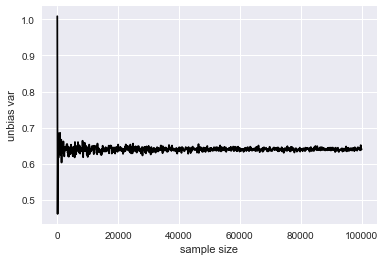

In [36]:
plt.plot(size_array, unbias_var_array_size, color = 'black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

In [37]:
n_size = 10000
n_trial = 50000

In [38]:
coin = np.array([0, 1])

In [39]:
count_coin = np.zeros(n_trial)

In [40]:
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = sp.sum(
        np.random.choice(coin, size = n_size, replace = True))

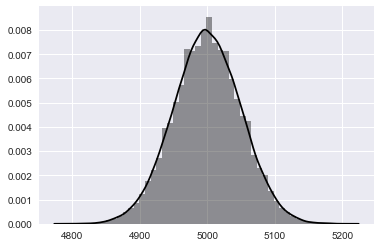

In [41]:
sns.distplot(count_coin, color = 'black')